[View in Colaboratory](https://colab.research.google.com/github/juangp3/ml-notebooks/blob/master/ml/1.1-ml-classificacao-iris.ipynb)

# Classificação

In [0]:
import os
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def figsize(x, y):
    # Get current size
    fig_size = plt.rcParams["figure.figsize"]
    # Prints: [8.0, 6.0]
    fig_size[0] = x
    fig_size[1] = y
    plt.rcParams["figure.figsize"] = fig_size

In [0]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            (X, y)]

In [0]:
def plot_classification(name, clf, X, y, cmap):
    score = clf.score(X, y)

    h = 0.2
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))    
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]    

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z>0, cmap=cmap, alpha=.8)
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Greys)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(name + " - Score %.2f" % score)

In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
   
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')
        
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


In [0]:
def plot_multi_class(name, clf, X, y, cmap=plt.cm.PRGn):
    score = clf.score(X, y)

    h = 0.2
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))    
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Greys)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(name + " - Score %.2f" % score)
    
    

In [0]:
from matplotlib import pyplot as plt
import numpy as np

def plot_surface(clf, X, y, 
                 xlim=(0, 10), ylim=(0, 5), n_steps=250, 
                 subplot=None, show=True):
    if subplot is None:
        fig = plt.figure()
    else:
        plt.subplot(*subplot)
        
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], n_steps), 
                         np.linspace(ylim[0], ylim[1], n_steps))
    
    if hasattr(clf, "decision_function"):
        z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, alpha=0.8, cmap=plt.cm.RdBu_r)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    
    if show:
        plt.show()

def plot_histogram(clf, X, y, subplot=None, show=True):
    if subplot is None:
        fig = plt.figure()
    else:
        plt.subplot(*subplot)
    
    if hasattr(clf, "decision_function"):
        d = clf.decision_function(X)
    else:
        d = clf.predict_proba(X)[:, 1]
    
    plt.hist(d[y == 0], bins=50, density=True, color="b", alpha=0.5)
    plt.hist(d[y == 1], bins=50, density=True, color="r", alpha=0.5)
    plt.hist(d[y == 2], bins=50, density=True, color="g", alpha=0.5)
    
    if show:
        plt.show()

def plot_clf(clf, X, y,subplot=None):
    plt.figure(figsize=(16, 8))
    plot_surface(clf, X, y, subplot=None, show=False)
    #plot_histogram(clf, X, y, subplot=(1, 2, 2), show=True)
    
    
def plot_logistic(name, clf, X, y):
    score = clf.score(X, y)

    xx, yy = np.mgrid[0:7:.01, 0:3:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]

    probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

    f, ax = plt.subplots(figsize=(5, 5))
    contour = ax.contourf(xx, yy, probs, 20, cmap="RdBu", vmin=0, vmax=1)
    #ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    #ax_c.set_ticks([0, .5, 1, 1.5, 2])

    ax.scatter(X[:,0], X[:, 1], c=y, s=50,
               cmap="Greens", vmin=-2, vmax=2,
               edgecolor="white", linewidth=1)

    ax.set(aspect="equal",
           xlim=(0, 7), ylim=(0, 3),
           xlabel="$X_1$", ylabel="$X_2$")
    plt.title(name + " - Score %.2f" % score)

Considerando os seguintes dados, gerados aleatoriamente:

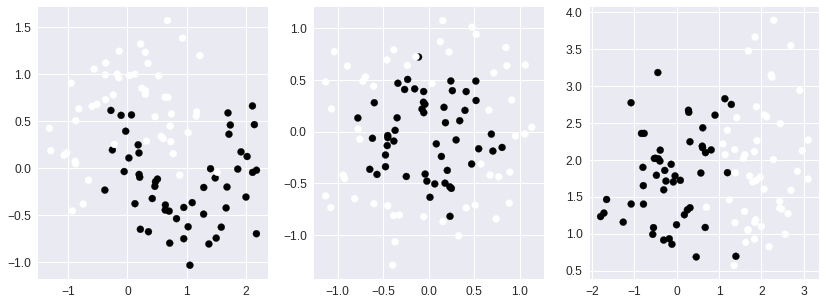

In [95]:
figsize(14, 5)
for i, (X, y) in enumerate(datasets):
    plt.subplot(1,3,i+1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Greys)

Gostaríamos de criar um **classificador** capaz de apropriadamente **separar** duas classes e corretamente classificar novas entradas.

## Solução usando Máquinas de suporte vetorial (SVM)

In [217]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
X, y = datasets[0]
svc.fit(X, y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [218]:
X
y

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0])

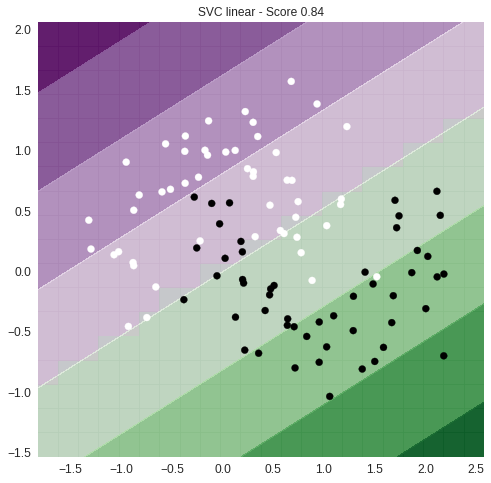

In [219]:
figsize(8,8)
plot_classification('SVC linear', svc, X, y, plt.cm.PRGn)

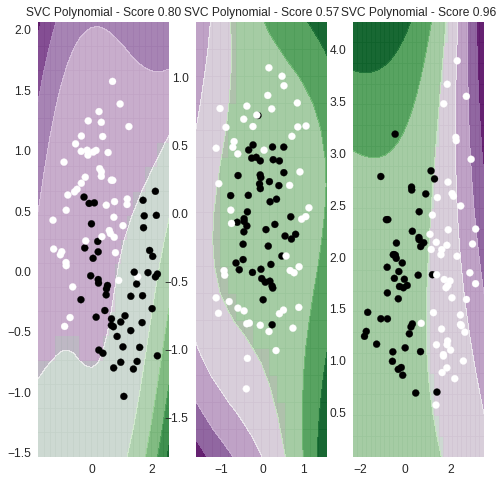

In [104]:
svc = SVC(kernel='poly', degree=3)

for dataset_idx, (X, y) in enumerate(datasets):
    plt.subplot(1, 3, dataset_idx+1)
    svc.fit(X, y) 
    plot_classification('SVC Polynomial', svc, X, y, plt.cm.PRGn)

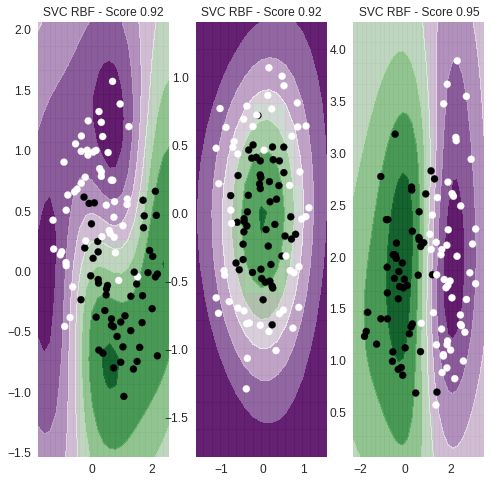

In [105]:
svc = SVC(kernel='rbf')

for dataset_idx, (X, y) in enumerate(datasets):
    plt.subplot(1, 3, dataset_idx+1)
    svc.fit(X, y) 
    plot_classification('SVC RBF', svc, X, y, plt.cm.PRGn)

# Exercício *Iris*

- 50 amostras de 3 espécies diferentes de íris (150 amostras no total)
- Medidas: comprimento da sépala, largura da sépala, comprimento da pétala, largura da pétala

![](https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/e43b96424ad781f57d492ce36351693aad01902a/images/03_iris.png)

## Aprendizado de máquina no conjunto de dados da íris

Enquadrado como um problema de **aprendizado supervisionado**: Preveja as espécies de uma íris usando as suas medidas. 

- Famoso conjunto de dados para aprendizado de máquina porque a previsão é **fácil**
- Saiba mais sobre o conjunto de dados da íris: [UCI Machine Learning Repository] (http://archive.ics.uci.edu/ml/datasets/Iris)
- Cada linha é uma **observação** (também conhecida como: exemplo, amostra, sample)
- Cada coluna é uma **feature** (também conhecido como: preditor, atributo, variável independente)
- Cada valor que estamos prevendo é a resposta (também conhecida como: target, outcome, label, dependent variable)
- A classificação é um aprendizado supervisionado no qual a resposta é categórica
- Regressão é a aprendizagem supervisionada em que a resposta é ordenada e contínua

In [13]:
from IPython.display import IFrame
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=300, height=200)

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()


In [15]:
print(type(iris))
print(iris.DESCR)

<class 'sklearn.utils.Bunch'>
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Mis

In [220]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [221]:
print(type(iris.data))
print(type(iris.target))
print(iris.data.shape)
print(iris.target.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 4)
(150,)


In [0]:
X = iris.data # Features
y = iris.target # Labels


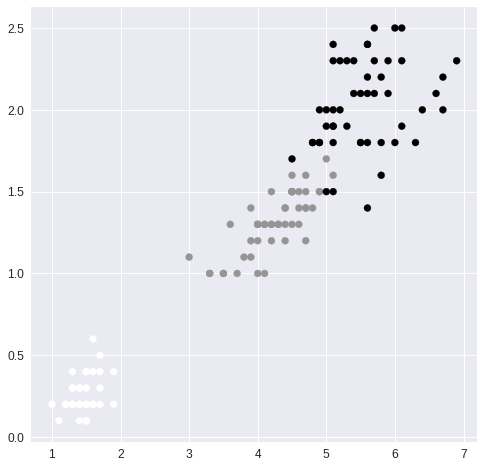

In [223]:
figsize(8,8)
plt.scatter(X[:,2], X[:,3], c=y)
X = iris.data[:,2:] # Features

## Exercício:

Crie um classificador capaz de separar as 3 classes de plantas.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


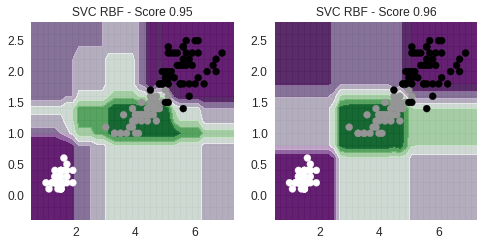

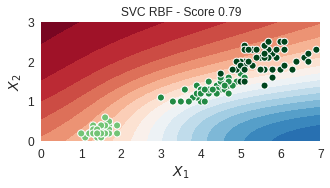

In [228]:
#Import classifiers and auxiliar functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier 

#set random seed to 42 to achieve same results
np.random.seed(42)

#instanciate the classifiers
rfc = RandomForestClassifier(n_estimators=500)
clf = ExtraTreesClassifier()
lor = LogisticRegression()


#split the dataset into traning and validation
train_features, valid_features, train_labels, valid_labels = train_test_split(X, y, train_size=0.30)


#Training the classifier
clf.fit(train_features, train_labels)
rfc.fit(train_features, train_labels)
lor.fit(train_features, train_labels)


plt.subplot(2, 2, 1)
plot_classification('SVC RBF', clf, X, y, plt.cm.PRGn)
plt.subplot(2, 2, 2)
plot_classification('SVC RBF', rfc, X, y, plt.cm.PRGn)
plot_logistic('SVC RBF', lor, X, y)




Apresente as métricas de validação Matriz de Confusão, Precision/Recall, F1 e ROC para este classificador.

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

valid_labels_clf = clf.predict(valid_features)
valid_labels_rfc = rfc.predict(valid_features)
valid_labels_lor = lor.predict(valid_features)


In [233]:
target_labels = ['Setosa', 'Versicolour', 'Virginica']
classificationLabels = ['RandomForest', 'ExtraTree','LogisticRegression']

reportArry = ['','','']
reportArry[0] = classification_report(valid_labels, valid_labels_clf, target_names=target_labels)
reportArry[1] = classification_report(valid_labels, valid_labels_rfc, target_names=target_labels)
reportArry[2] = classification_report(valid_labels, valid_labels_lor, target_names=target_labels)
  
  
for i in range(0,len(reportArry)):
  print(reportArry[i])  


             precision    recall  f1-score   support

     Setosa       1.00      1.00      1.00        40
Versicolour       0.91      0.88      0.89        33
  Virginica       0.88      0.91      0.89        32

avg / total       0.93      0.93      0.93       105

             precision    recall  f1-score   support

     Setosa       1.00      1.00      1.00        40
Versicolour       0.91      0.91      0.91        33
  Virginica       0.91      0.91      0.91        32

avg / total       0.94      0.94      0.94       105

             precision    recall  f1-score   support

     Setosa       1.00      1.00      1.00        40
Versicolour       0.93      0.39      0.55        33
  Virginica       0.61      0.97      0.75        32

avg / total       0.86      0.80      0.78       105



## **Comparação dos Classificadores**

In [234]:
print('{:>18} {}'.format('Classifier Type',reportArry[0].split('\n', 1)[0][11:]))
for i in range(0,len(reportArry)):
  print('{:>18} {}'.format(classificationLabels[i],reportArry[i].split('avg / total')[-1]))



   Classifier Type   precision    recall  f1-score   support
      RandomForest        0.93      0.93      0.93       105

         ExtraTree        0.94      0.94      0.94       105

LogisticRegression        0.86      0.80      0.78       105



## Matrix

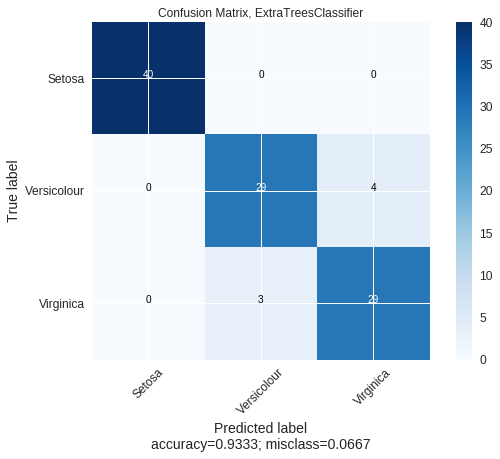

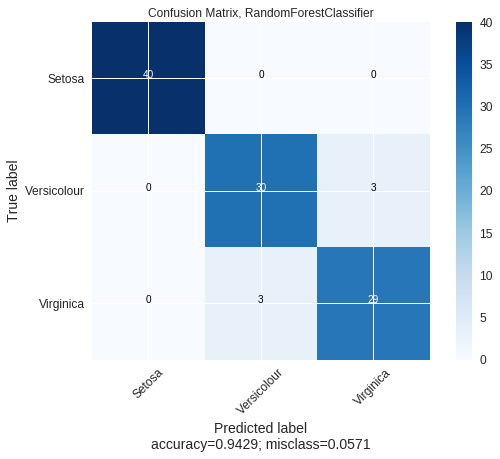

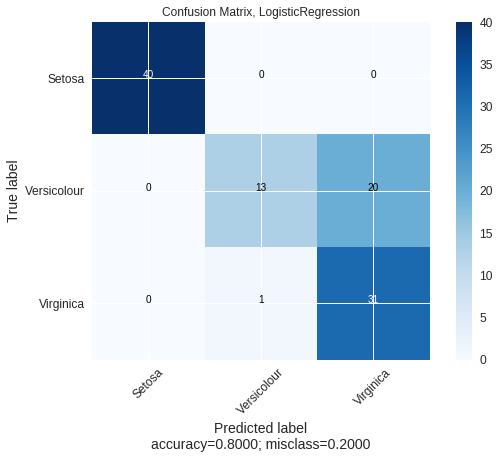

In [236]:
cm_clf = confusion_matrix(valid_labels, valid_labels_clf)
cm_rfc = confusion_matrix(valid_labels, valid_labels_rfc)
cm_lor = confusion_matrix(valid_labels, valid_labels_lor)


plot_confusion_matrix(cm_clf, normalize    = False, target_names = target_labels,  title        = "Confusion Matrix, ExtraTreesClassifier")
plot_confusion_matrix(cm_rfc, normalize    = False, target_names = target_labels,  title        = "Confusion Matrix, RandomForestClassifier")
plot_confusion_matrix(cm_lor, normalize    = False, target_names = target_labels,  title        = "Confusion Matrix, LogisticRegression")


ValueError: ignored